<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos usando gzip y pickle.

In [2]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [3]:
print( train[0].shape, train[1].shape )

(50000, 784) (50000,)


Tenemos 50000 arreglos de 784 entradas cada uno, el cual representa un número el cual se puede observar con el siguiente código:

clase:  5


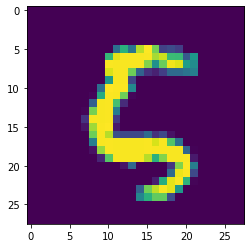

In [4]:
idimg = 2000

im =  train[0][idimg].reshape(-1, 28) #train[0] es una matriz,
#train[0][j] es un vector de longitud 784
#reshape(-1,28) significa crea una matriz de k x 28 tal que k*28=784
plt.imshow(im)#Plotealo como imagen.
print('clase: ', train[1][idimg])

train[1][k] guarda el número que representa el respectivo train[0][k].

------------------------------------------------

Implementación del descenso de gradiente.

Consideramos el tamaño de paso $\alpha_k=\frac{d_k^Td_k}{d_k^THd_k}$

*   Elemento de la lista
*   Elemento de la lista



In [5]:
def get_alpha_k(x,d,H):#Si tenemos H la matriz Hessiana.
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)

Nuestra función de descenso recibe una condición inicial $x_0$, la función a minimizar, el gradiente y Hessiano de la misma, y hay parámetros opcionales para tolerancia del gradiente y número máximo de iteraciones, así como un parámetro (False por default) que grafica el valor de $f(x_k)$ y $||g_k||$.

In [145]:
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1),"   ","f(x_k)= ",str(f(x_1)))
    else:
        L=0
        plt.plot(range(L+1,len(F)),F[L:-1])
        plt.title("k vs. F(X_k)")   
        plt.show()         
        plt.plot(range(L+1,len(G)),G[L:-1])
        plt.title("k vs. ||g(X_k)||")   
        plt.show()
    print("iterations: ",k)
    return (x_1)

Definimos $f$, $\nabla f$ y $H_f$ para el problema.

Primero seleccionamos un subconjunto de los datos, tales que $y\in\{0,1\}$.

In [10]:
def common_exp(i,b,b_0):
    u=np.dot(x[i],b)
    return(np.exp(-u-b_0))

In [11]:
def h(b_and_b_0):
    b=b_and_b_0[0:-1]
    b_0=b_and_b_0[-1]
    suma=0
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        if(y[i]==1):
            suma+=-np.log(1+comm_exp)
        else:
            suma+=np.dot(x[i],b)-np.log(1+comm_exp)
    return suma

In [12]:
def grad_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_g=np.zeros(len(b_and_b_0))
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        if(y[i]==1):
            suma_g+=(comm_exp/(1+comm_exp))*x_plus[i]
        else:
            suma_g+=-(1/(1+comm_exp))*x_plus[i]
    return suma_g

In [13]:
def Hessian_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_h=np.zeros((len(b_and_b_0),len(b_and_b_0)))
    for i in range(n):
        comm_exp=common_exp(i=i,b=b,b_0=b_0)
        suma_h+=-(comm_exp)/((1+comm_exp)**2)*np.outer(x_plus[i],x_plus[i])
        
    return suma_h

In [143]:
def subset(k):
    y=train[1][train[1]<2]
    x=train[0][train[1]<2]
    np.random.seed(0)
    x=x[np.random.randint(0,len(x),k)]
    np.random.seed(0)
    y=y[np.random.randint(0,len(x),k)]
    n=len(x)
    x_plus=np.c_[x,np.ones(n)]
    x_plus.shape

In [146]:
loc_min=np.ones(785)*0.05
for k in [100]:
    start = time.monotonic()
    subset(k)
    loc_min=Steepest_descent(x_0=loc_min,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=1000,pr='True')
    print("||g(x_k)||= ", np.linalg.norm(grad_h(loc_min)))
    end = time.monotonic()
    tiempo_total = timedelta(seconds=end - start).total_seconds()
    print('Tiempo: ', tiempo_total)

There wasnt convergence after 1000 iterations.
Last iteration: [ 5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.00000000e-02  5.00000000e-02  5.00000000e-02
  5.00000000e-02  5.0000000

In [111]:
#bbb=np.loadtxt("b_1000.txt",skiprows=1)

In [147]:
#Guardar la solucion
fo = open(f"b_100.txt", "w")
fo.write(str(785)+"\n")#Add size
np.savetxt(fo, loc_min, fmt='%1.9e', comments='')
fo.close()

In [16]:
import time
from datetime import timedelta

start = time.monotonic()

#Hacer cositas
end = time.monotonic()


tiempo_total = timedelta(seconds=end - start).total_seconds()
print('Tiempo de ejecución original', tiempo_total)

#Segundo intento
start = time.monotonic()

#Hacer lo mismo
end = time.monotonic()


tiempo_total = timedelta(seconds=end - start).total_seconds()
print('Tiempo de ejecución con inversa', tiempo_total)

Tiempo de ejecución original 3e-05
Tiempo de ejecución con inversa 3.5e-05
